In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
df = pd.read_csv('social_network_ads.csv')

In [156]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [157]:
df = df.iloc[:,2:]
df.sample(5)

,Age,EstimatedSalary,Purchased
288,41,79000,0
300,58,38000,1
17,45,26000,1
241,38,59000,0
62,23,66000,0


#### Train Test Split
Whenever you do feature scaling, it is recommended that you do train_test_split beforehand.

In [158]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis = 1),
                                                 df['Purchased'],test_size = 0.2,random_state=0)
X_train.shape, X_test.shape

((320, 2), (80, 2))

In [159]:
X_train

,Age,EstimatedSalary
336,58,144000
64,59,83000
55,24,55000
106,26,35000
300,58,38000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


#### StandardScalar

- learns from training data and applies to training and testing data 
- takes dataframe as input and returns  numpy array

In [160]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

#fit the scalar to the training set, it will learn the parameters.
scalar.fit(X_train)

#transform train and test set
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [161]:
X_train_scaled

array([[ 1.92295008e+00,  2.14601566e+00],
       [ 2.02016082e+00,  3.78719297e-01],
       [-1.38221530e+00, -4.32498705e-01],
       [-1.18779381e+00, -1.01194013e+00],
       [ 1.92295008e+00, -9.25023920e-01],
       [ 3.67578135e-01,  2.91803083e-01],
       [ 1.73156642e-01,  1.46942725e-01],
       [ 2.02016082e+00,  1.74040666e+00],
       [ 7.56421121e-01, -8.38107706e-01],
       [ 2.70367388e-01, -2.87638347e-01],
       [ 3.67578135e-01, -1.71750061e-01],
       [-1.18475597e-01,  2.20395980e+00],
       [-1.47942605e+00, -6.35303205e-01],
       [-1.28500455e+00, -1.06988428e+00],
       [-1.38221530e+00,  4.07691369e-01],
       [-1.09058306e+00,  7.55356227e-01],
       [-1.47942605e+00, -2.00722133e-01],
       [ 9.50842613e-01, -1.06988428e+00],
       [ 9.50842613e-01,  5.81523798e-01],
       [ 3.67578135e-01,  9.87132798e-01],
       [ 5.61999628e-01, -8.96051849e-01],
       [-6.04529329e-01,  1.45068594e+00],
       [-2.12648508e-02, -5.77359062e-01],
       [-6.

In [162]:
X_train.columns
X_test.columns

Index(['Age', 'EstimatedSalary'], dtype='object')

In [163]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [164]:
scalar.mean_

array([3.8218750e+01, 6.9928125e+04])

In [165]:
np.sqrt(scalar.var_)

array([1.02869285e+01, 3.45159993e+04])

In [166]:
scalar.var_

array([1.05820898e+02, 1.19135421e+09])

In [167]:
np.round(X_train.describe(),2)

,Age,EstimatedSalary
count,320.00,320.00
mean,38.22,69928.12
std,10.30,34570.06
min,18.00,15000.00
25%,30.00,43000.00
50%,38.00,69500.00
75%,46.00,88000.00
max,60.00,150000.00


In [168]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-1.6
25%,-0.8,-0.8
50%,-0.0,-0.0
75%,0.8,0.5
max,2.1,2.3


### Effect of scaling

Data will be mean centered and it will scale down data with s.d = 1 and mean = 0

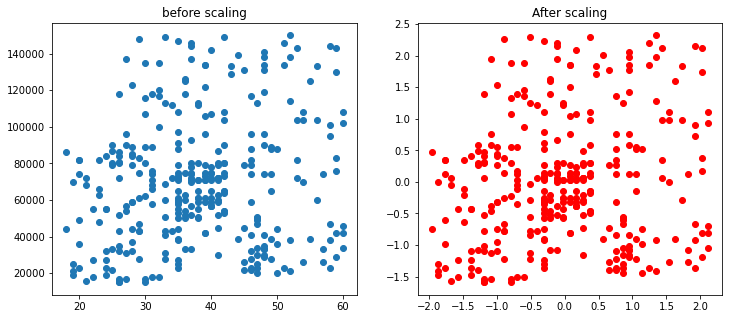

In [169]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize = (12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("before scaling")

ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color = 'red')
ax2.set_title("After scaling")

plt.show()

How data gets benefitted from scaling

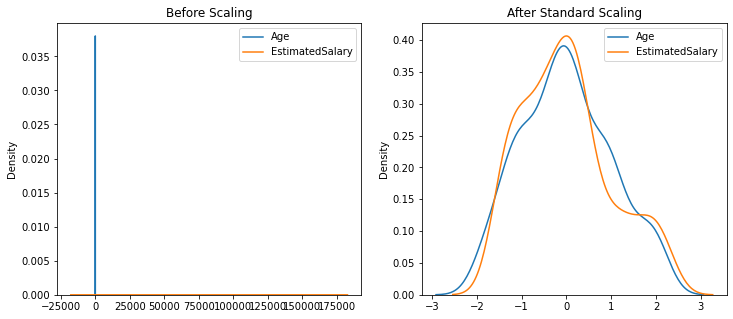

In [170]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1,label = 'Age')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1,label = 'EstimatedSalary')
ax1.set(xlabel=None)
ax1.legend()

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2,label = 'Age')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2,label = 'EstimatedSalary')
ax2.legend()
ax2.set(xlabel=None)
plt.show()

Same distribution with different scale

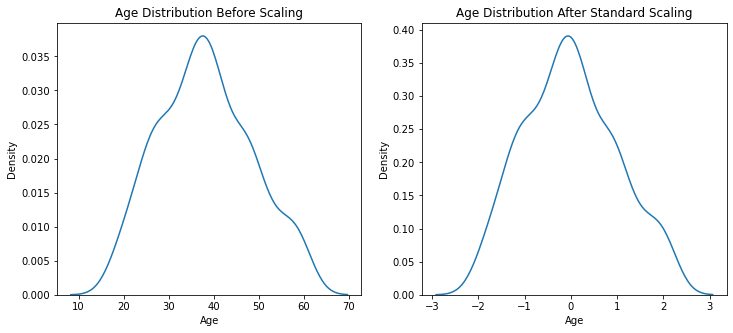

In [171]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()


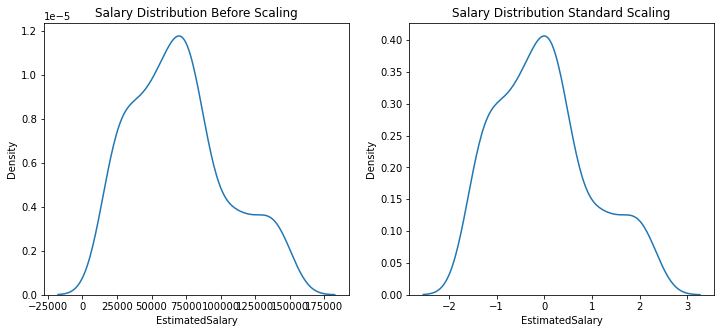

In [172]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

## why scaling is important

In [173]:
from sklearn.linear_model import LogisticRegression

In [174]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [175]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [176]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [177]:
from sklearn.metrics import accuracy_score

In [178]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.725
Scaled 0.925


In [179]:
from sklearn.tree import DecisionTreeClassifier

In [180]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [181]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [182]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [183]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.9125
Scaled 0.9


In [153]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


### Effect of outliers


kono effect hoy na. scaling korle outliers er upore. amar explicitly outliers handle korte hobe jehetu scaling er karone outlier er upor kono impact pore na


In [185]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


In [186]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


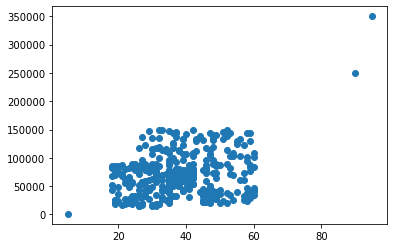

In [187]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [189]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [190]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

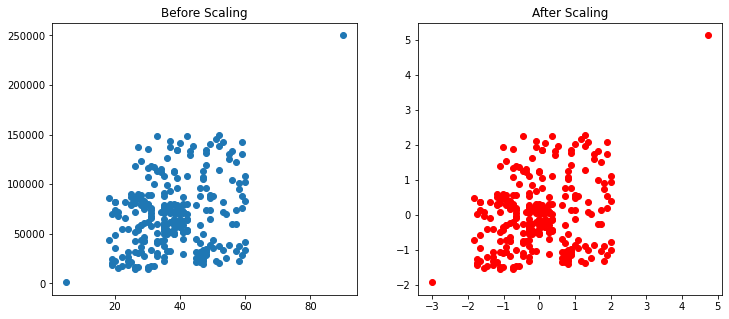

In [191]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()